In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires (2).csv to forestfires (2).csv


In [3]:
pd.set_option('max_columns',None)
forest_data = pd.read_csv('forestfires (2).csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [4]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

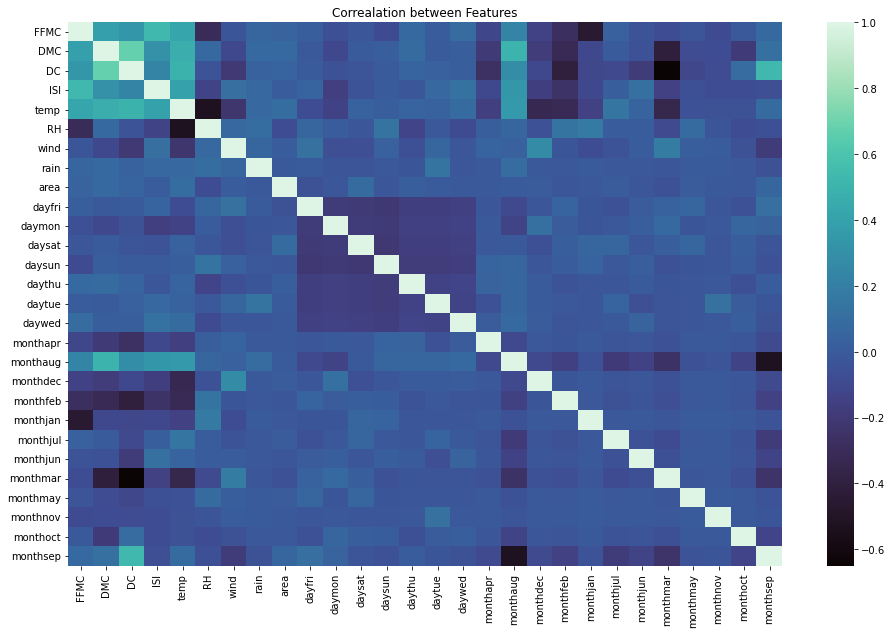

In [5]:
corr=forest_data.corr()
plt.figure(figsize=(16,10))
plt.title("Correalation between Features")
sns.heatmap(corr,cmap='mako');

In [6]:
le=LabelEncoder()
forest_data['month']=le.fit_transform(forest_data['month'])
forest_data['day']= le.fit_transform(forest_data['day'])
forest_data['size_category'] = le.fit_transform(forest_data['size_category'])

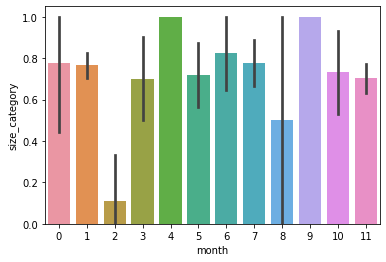

In [7]:
sns.barplot(x='month',data=forest_data,y='size_category');

In [8]:
X= forest_data.iloc[:,0:30]
Y= forest_data['size_category']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state=44)
print("X_train-shape:" + str(X_train.shape))
print("X_test-shape:" + str(X_test.shape))
print("Y_train-shape:" + str(Y_train.shape))
print("Y_test-shape:" + str(Y_test.shape))

X_train-shape:(413, 30)
X_test-shape:(104, 30)
Y_train-shape:(413,)
Y_test-shape:(104,)


In [9]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,8,45,55,40,0.8,0.3,0.9],'C':[15,14,13,12,11,10,0.1,0.001,5,16,19,20] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 5, 16, 19,
                                20],
                          'gamma': [50, 5, 10, 0.5, 8, 45, 55, 40, 0.8, 0.3,
                                    0.9],
                          'kernel': ['rbf']}])

In [10]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7362369337979093)

In [11]:
classifier = SVC(C=15,gamma=0.5)
classifier.fit(X_train,Y_train)

SVC(C=15, gamma=0.5)

In [12]:
pred_on_train = classifier.predict(X_train)
accuracy_on_train= accuracy_score(pred_on_train,Y_train)
accuracy_on_train

1.0

In [13]:
pred_on_test=classifier.predict(X_test)
accuracy_on_test= accuracy_score(pred_on_test,Y_test)
accuracy_on_test

0.7596153846153846